In [ ]:
#VIDEO SCRAPING
import cv2
vidcap = cv2.VideoCapture('vid.mp4')
def getFrame(sec):
    vidcap.set(cv2.CAP_PROP_POS_MSEC,sec*1000)
    hasFrames,image = vidcap.read()
    if hasFrames:
        cv2.imwrite("image"+str(count)+".jpg", image)     # save frame as JPG file
    return hasFrames
sec = 0
frameRate = 1/15
count=1
success = getFrame(sec)
while success:
    count = count + 1
    sec = sec + frameRate
    sec = round(sec, 2)
    success = getFrame(sec)

In [ ]:
# ============================================================================================================PART1

In [ ]:
#MOUNTING DRIVE
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow
import os
import numpy as np


In [ ]:
# example of loading the vgg16 model
from keras.applications.vgg16 import VGG16
# load model
model = VGG16()
# summarize the model
model.summary()

553467096/553467096 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from pathlib import Path

In [ ]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model


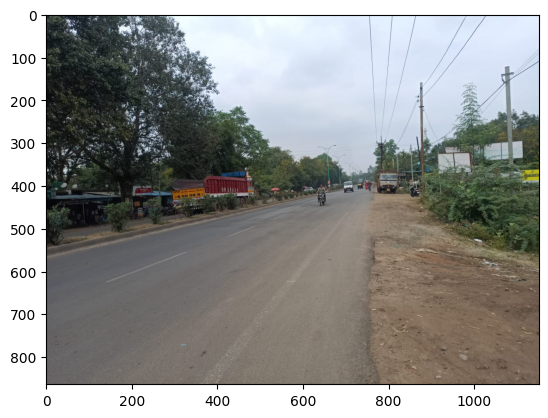

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

path="/content/drive/MyDrive/RoadsDataset/maharashtra/maharastra_road.jpg"
image = load_img(path, target_size=(224, 224))
img = mpimg.imread(path)
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)
imgplot = plt.imshow(img)
# #show the picture
plt.show()



In [ ]:
from keras.applications.vgg16 import preprocess_input, decode_predictions

In [ ]:
yhat = model.predict(image)
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]

print('%s (%.2f%%)' % (label[1], label[2]*100))

35363/35363 [==============================] - 0s 0us/step
traffic_light (15.20%)


In [ ]:
# load model
model = VGG16()
# remove the output layer
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

In [ ]:
import pickle

In [ ]:
features = model.predict(image)
print(features.shape)
# save to file
pickle.dump(features, open('feature.pkl', 'wb'))

1/1 [==============================] - 1s 746ms/step
(1, 4096)


In [ ]:
# alternative approach to adding a Flatten layer would be to define the VGG16 model with an average pooling layer, and then add fully connected layers.
#  Perhaps try both approaches on your application and see which results in the best performance.

In [ ]:
model = VGG16(include_top=False, input_shape=(300, 300, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

In [ ]:
flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(1024, activation='relu')(flat1)
output = Dense(10, activation='softmax')(class1)
# define new model
model = Model(inputs=model.inputs, outputs=output)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 300, 300, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 300, 300, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 300, 300, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 150, 150, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 150, 150, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 150, 150, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 75, 75, 128)       0   

In [ ]:
model = VGG16(include_top=False, input_shape=(300, 300, 3))
# mark loaded layers as not trainable
for layer in model.layers:
 layer.trainable = False

In [ ]:
model = VGG16(include_top=False, input_shape=(300, 300, 3))
# mark some layers as not trainable
model.get_layer('block1_conv1').trainable = False
model.get_layer('block1_conv2').trainable = False
model.get_layer('block2_conv1').trainable = False
model.get_layer('block2_conv2').trainable = False

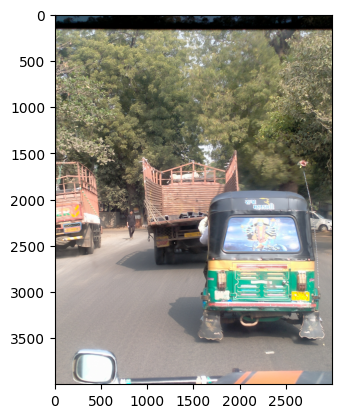

In [ ]:
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg

path="/content/drive/MyDrive/RoadsDataset/Gujrat/IMG20221213111739.jpg"
image = load_img(path, target_size=(224, 224))
img = mpimg.imread(path)
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)
imgplot = plt.imshow(img)
# #show the picture
plt.show()

In [ ]:
from keras.applications.vgg16 import preprocess_input, decode_predictions

In [ ]:
yhat = model.predict(image)
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]

print('%s (%.2f%%)' % (label[1], label[2]*100))

ValueError: ignored

In [ ]:
# ================================================================================== PART2

In [ ]:
#MODEL BUILDING FOR FEATURE EXTRACTION USING PRETRAINED VGG-16 CNN MODEL WITH TRANSFER LEARNING BASES IMAGENET WEIGHTS

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from pathlib import Path
features = []
img_paths = []
from PIL import Image
class fe:
    def __init__(self):
        # Use VGG-16 as the architecture and Nothing predefined for the weight
        # new_input = input(shape=(640, 480, 3))
        base_model = VGG16(weights='imagenet')
        # Customize the model to return features from fully-connected layer
        self.model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)
    def extract(self, img):
        # Resize the image
        img = img.resize((224, 224))
        # Convert the image color space
        img = img.convert('RGB')
        # Reformat the image
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        # Extract Features
        feature = self.model.predict(x)[0]
        return feature / np.linalg.norm(feature)


In [ ]:
# fe().__init__.base_model.summary()

In [ ]:
# Iterate through images (Change the path based on your image location)
# data_paths = [i for i in (os.path.join(in_dir, f) for f in os.listdir(in_dir)) if os.path.isfile(i
path="/content/drive/MyDrive/RoadsDataset/Odisha"
data_paths = [os.path.join(pth, f) for pth, dirs, files in os.walk(path) for f in files]
for img_path in sorted(data_paths):
    print(img_path)
    # Extract Features
    feature = fe().extract(img=Image.open(img_path))
    features.append(feature)
    img_paths.append(img_path)
    #data = [download_images(f, mmap_mode='r') for f in data_paths]
      # # Save the Numpy array (.npy) on designated path
    # feature_path = "/content/drive/MyDrive/Feature_Vector.npy"
    # np.save(feature_path, feature)

features=np.array(features)
img_paths=np.array(img_paths)

/content/drive/MyDrive/RoadsDataset/Odisha/Jazpur_Scene.jpeg
1/1 [==============================] - 1s 727ms/step
/content/drive/MyDrive/RoadsDataset/Odisha/Jazpur_Scene3(1).jpeg
1/1 [==============================] - 1s 1s/step
/content/drive/MyDrive/RoadsDataset/Odisha/Jazpur_Scene4.jpeg


1/1 [==============================] - 1s 715ms/step
/content/drive/MyDrive/RoadsDataset/Odisha/Jazpur_Scene5.jpeg


1/1 [==============================] - 1s 726ms/step
/content/drive/MyDrive/RoadsDataset/Odisha/Jazpur_road.jpeg
1/1 [==============================] - 1s 1s/step
/content/drive/MyDrive/RoadsDataset/Odisha/Jazpur_road3.jpeg
1/1 [==============================] - 1s 1s/step
/content/drive/MyDrive/RoadsDataset/Odisha/Jazpur_road5.jpeg
1/1 [==============================] - 1s 1s/step
/content/drive/MyDrive/RoadsDataset/Odisha/Jazpur_roads2.jpeg
1/1 [==============================] - 1s 717ms/step
/content/drive/MyDrive/RoadsDataset/Odisha/Jazpur_scene2.jpeg
1/1 [==============================] - 1s 751ms/step
/content/drive/MyDrive/RoadsDataset/Odisha/Jazpur_scene3.jpeg
1/1 [==============================] - 1s 1s/step


In [ ]:
# import numpy as np
# from PIL import Image
# # from feature_extractor import FeatureExtractor
# from datetime import datetime
# from flask import Flask, request, render_template
# from pathlib import Path

# # app = Flask(__name__)

# # Read image features
# # fe = FeatureExtractor()

# img_paths = []
# for feature_path in Path("/content/drive/MyDrive/Feature_Vector").glob("*.npy"):
#     features.append(np.load(feature_path))
#     img_paths.append(Path("/content/drive/MyDrive/Image") / (feature_path.stem + ".jpg"))
# features = np.array(features)

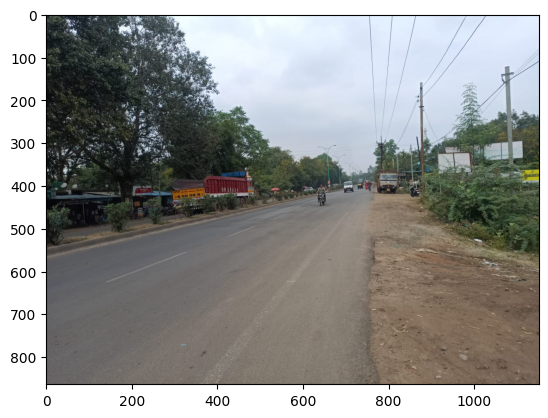

In [ ]:
#IDENTIFYING THE 10 CLOSEST IMAGES

import matplotlib.pyplot as plt
import numpy as np
# Insert the image query
pathquery="/content/drive/MyDrive/RoadsDataset/maharashtra/maharastra_road.jpg"
img = mpimg.imread(pathquery)
img = Image.open(pathquery)
imgplot=plt.imshow(img)
plt.show()



1/1 [==============================] - 1s 1s/step


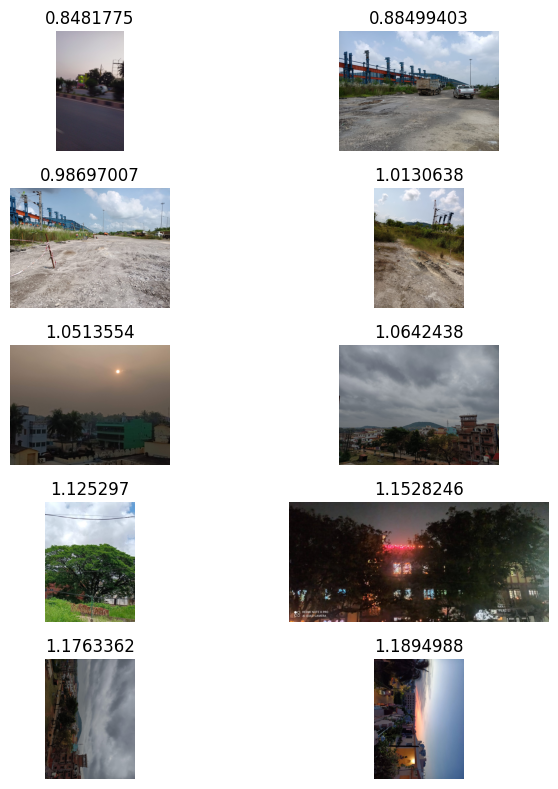

In [ ]:
# Extract its features
query = fe().extract(img)
# Calculate the similarity (distance) between images
dists = np.linalg.norm(features-query, axis=1)
# Extract 10 images that have lowest distance
ids = np.argsort(dists)[:10]
scores = [(dists[id], img_paths[id]) for id in ids]
# Visualize the result
axes=[]
fig=plt.figure(figsize=(8,8))
for a in range(5*2):
    score = scores[a]
    axes.append(fig.add_subplot(5, 2, a+1))
    subplot_title=str(score[0])
    axes[-1].set_title(subplot_title)
    plt.axis('off')
    plt.imshow(Image.open(score[1]))
fig.tight_layout()
plt.show()

In [ ]:
from sklearn.decomposition import PCA
num_feature_dimensions=10      # Set the number of features
pca = PCA(n_components = num_feature_dimensions)
pca.fit(features)
feature_list_compressed = pca.transform(features)

# For speed and clarity, we'll analyze about first half of the dataset.
selected_features = features[:4000]
# selected_class_ids = class_ids[:4000]
# selected_filenames = filenames[:4000]

tsne_results =TSNE(n_components=2,verbose=1,metric='euclidean').fit_transform(selected_features)

# Plot a scatter plot from the generated t-SNE results
colormap = plt.cm.get_cmap('coolwarm')
scatter_plot = plt.scatter(tsne_results[:,0],tsne_results[:,1], c =
               selected_class_ids, cmap=colormap)
plt.colorbar(scatter_plot)
plt.show()